
    Pandas는 Panel Datas의 줄임말로, 
    파이썬을 이용한 데이터 분석에서 가장 많이 사용되는 라이브러리이다.

    Numpyt를 기반으로 만들어졋으며, 데이터 분석을 위한 효율적인 데이터구조를 제공한다.
    
    ndarray - 다차원 배열 
    
    Pandas의 자료구조
    1. Series - 1차원 배열형태 자료구조(벡터)
        Series(ndarray, index)
        인덱스를 지정안 하면 각 사이즈 별로 들어간다.
    2. DataFrame - 2차원 배열형태 자료구조(메트릭스) 가장 많이 사용된다.
    
        중요* 행을 구분하는 인덱스
        중요* 열을 구분하는 컬럼
        
        지정이 없으면 인덱스는 정수로 설정한다.
        
        한번 지정된 인덱스는 변경되지 않는다.
        
    3. Panel - 3차원 배열형태 자료구조


### Series
#### 1.시리즈 생성, 구조확인

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
#ser1 = Series?

In [3]:
ser1 = Series

In [4]:
'''
Series(
    data=None,
    index=None,
    dtype=None,
    name=None,
    copy=False,
    fastpath=False,
)
모든 데이터는 배열형태로 넣어야 한다.
index를 명시적으로 지정하지 않으면 자동적으로 0 n-1까지의 정수로 지정된다.
'''
np.random.seed(100) # seed값으로 100을 넣어 랜덤값을 고정 시킨다.
# ser1 = Series(np.random.randint(10,20,5), index = ['a','b','c','d','e'])
ser1 = Series(np.random.randint(10,20,5), index = list('abcde'))
print(ser1) # 인덱스와 벨류를 반환한다.
print(ser1.index) # 인덱스만 반환
print(ser1.values) # 벨류만 반환
print(ser1.dtype) # 데이터 타입을 반환

a    18
b    18
c    13
d    17
e    17
dtype: int32
Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
[18 18 13 17 17]
int32


#### 시리즈 값 조회하기

    중요~! 단일 값을 선택하거나 여러값을 선택할때
    인덱싱과 슬라이싱이 나온다.

    인덱스로 숫자나 라벨을 사용할 수 있다. 이때, 슬라이싱되는 방법이 달라진다.
    1. 라벨사용
    2. 숫자사용
    슬라이싱은 방법이 다르다.

In [5]:
print(ser1['c']) # 인덱싱(라벨사용)
print(ser1[2])  # 인덱싱(숫자사용)
print(ser1['b':'d']) # 슬라이싱 (라벨사용) 마지막을 포함한다.
print(ser1[1:4])    # 슬라이싱 (숫자사용)

13
13
b    18
c    13
d    17
dtype: int32
b    18
c    13
d    17
dtype: int32


In [6]:
# 간단하게 응용해서 조회하기
ser1

a    18
b    18
c    13
d    17
e    17
dtype: int32

In [7]:
ser1[::2] # 2칸씩 뛰어서 조회

a    18
c    13
e    17
dtype: int32

In [8]:
ser1[:2]

a    18
b    18
dtype: int32

In [9]:
ser1_1 = ser1[::2]
ser1

a    18
b    18
c    13
d    17
e    17
dtype: int32

#### 3. 시리즈 간의 연산과 누락 데이터 처리하기

In [10]:
print(ser1_1)
print(ser1)

a    18
c    13
e    17
dtype: int32
a    18
b    18
c    13
d    17
e    17
dtype: int32


In [11]:
result = ser1_1 + ser1 
# 한쪽에 값이 없는경우 NaN으로 채워짐과 동시에 데이터 타입을 실수형으로 바뀐다. 바뀌는 이유는 NaN이 float64인것도 있고,
# int보다 더 큰 값으로 데이터형이 변하기 때문이다. 
print(result) 

a    36.0
b     NaN
c    26.0
d     NaN
e    34.0
dtype: float64


#### 4. 누락테이터 조회하기 - 
    isnull() - 누락데이터를 조회할때 사용
    notnull() - 누락데이터가 아닌것을 조회할때 사용 

In [12]:
print(result.isnull())
print('*'*30)
print(result.notnull())
print('*'*30)
print(result.isnull().sum()) # 누락된 데이터의 갯수 출력

a    False
b     True
c    False
d     True
e    False
dtype: bool
******************************
a     True
b    False
c     True
d    False
e     True
dtype: bool
******************************
2


In [13]:
b_nan = print('\033[30m' + 'nan' + '\033[0m')
r_nan = print('\033[31m' + 'nan' + '\033[0m')
a = np.where(result.isnull(),'nan',False)            # 
b = np.where(result.isnull(),'nan',result.isnull())  # 
c = result[result.isnull()]                               # nan만 나오게한다.
d = result[result.notnull()]                            # nan이 아닌것만 나오게 한다.
print(a)
print(b)
print(c)
print(d)

nan
nan
['False' 'nan' 'False' 'nan' 'False']
['False' 'nan' 'False' 'nan' 'False']
b   NaN
d   NaN
dtype: float64
a    36.0
c    26.0
e    34.0
dtype: float64


#### 5. Matplot을 이용한 시각화

In [14]:
import matplotlib.pyplot as plt

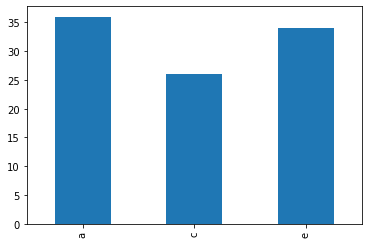

In [15]:
# 누락테이터가 아닌 값들을 시각화해 본다.
result[result.notnull()].plot(kind='bar')
plt.show() # notnull인 데이터만 출력~! 

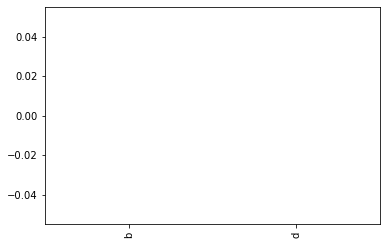

In [16]:
result[result.isnull()].plot(kind='bar') 
plt.show() # null인 데이터만 출력~!  numeric한 것만 그래프 대상으로 잡는다. 지금 이건 바람직 하지 않음.